<a href="https://colab.research.google.com/github/alejo27perez/LAB-5-Variabilidad-de-la-Frecuencia-Cardiaca-usando-la-Transformada-Wavele/blob/main/lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

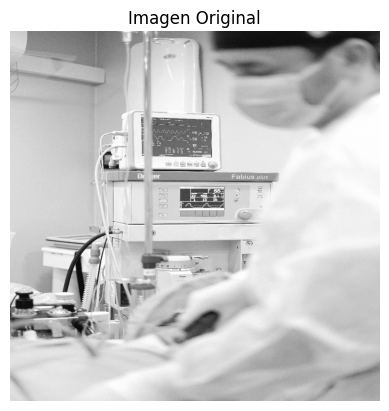

Dimensiones: (1024, 1024)


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread("pexels-shvetsa-4483339.jpg", cv2.IMREAD_GRAYSCALE)


img = cv2.resize(img, (1024,1024))

plt.imshow(img, cmap='gray')
plt.title("Imagen Original")
plt.axis("off")
plt.show()

print("Dimensiones:", img.shape)


In [2]:
def Traslacion(imagen, dx, dy):
    N, M = imagen.shape
    salida = np.zeros_like(imagen)

    for i in range(N):
        for j in range(M):
            ni = i + dy
            nj = j + dx

            if 0 <= ni < N and 0 <= nj < M:
                salida[ni, nj] = imagen[i, j]

    return salida


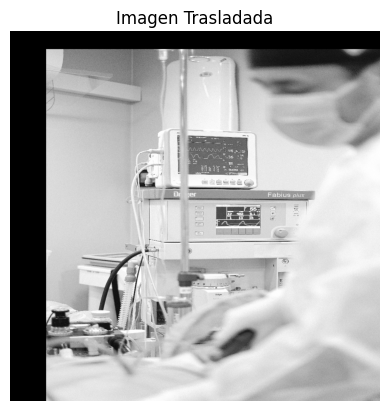

In [3]:
img_t = Traslacion(img, 100, 50)

plt.imshow(img_t, cmap='gray')
plt.title("Imagen Trasladada")
plt.axis("off")
plt.show()


In [4]:
def Rotacion(imagen, angulo):
    N, M = imagen.shape
    centro = (M//2, N//2)

    matriz_rot = cv2.getRotationMatrix2D(centro, angulo, 1)
    rotada = cv2.warpAffine(imagen, matriz_rot, (M, N))

    return rotada


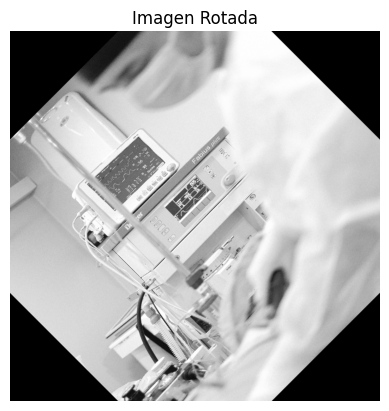

In [5]:
img_r = Rotacion(img, 45)

plt.imshow(img_r, cmap='gray')
plt.title("Imagen Rotada")
plt.axis("off")
plt.show()


In [6]:
def Escalamiento(imagen, escala):
    N, M = imagen.shape
    nueva = cv2.resize(imagen, None, fx=escala, fy=escala)
    return nueva


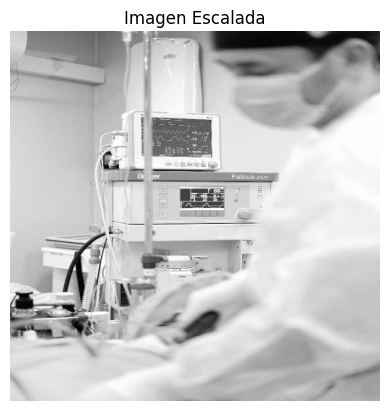

In [7]:
img_s = Escalamiento(img, 0.5)

plt.imshow(img_s, cmap='gray')
plt.title("Imagen Escalada")
plt.axis("off")
plt.show()


In [8]:
!wget https://www.dropbox.com/s/trcnlnrkoq9hcq3/rices.png

--2026-02-18 04:26:03--  https://www.dropbox.com/s/trcnlnrkoq9hcq3/rices.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/bunyy7qfbby6o86ksf5jg/rices.png?rlkey=tf7kbgo2a8n8hc98kz7060u5w [following]
--2026-02-18 04:26:03--  https://www.dropbox.com/scl/fi/bunyy7qfbby6o86ksf5jg/rices.png?rlkey=tf7kbgo2a8n8hc98kz7060u5w
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5c3909c26d4fd2ce82f559b50e.dl.dropboxusercontent.com/cd/0/inline/C7E7Pkft110VTHOMzNdGU8_5TwF_vcjswyyr25Ae3qioK4WJY2rtn4MS_Ac_j1t3ghh_CvYezBGvX6hA6HcoN6u9l_7O-tBbuMCWSEIfW5NiIoaf0dV_38V770CCPaHVGj-LoBRXhDt_gCK1e6Ejx6-8/file# [following]
--2026-02-18 04:26:04--  https://uc5c3909c26d4fd2ce82f559b50e.dl.dropboxusercontent.com/cd/0/inline/C7E7Pkft11

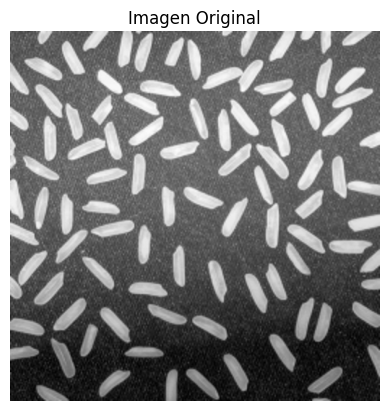

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

R2 = cv2.imread("rices.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(R2, cmap='gray')
plt.title("Imagen Original")
plt.axis("off")
plt.show()


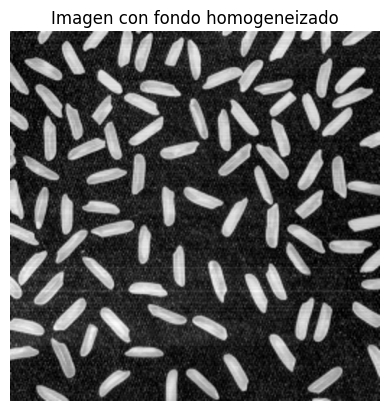

In [11]:
N, M = R2.shape
Xm = np.zeros((N, M), np.uint8)

for i in range(N):
    xmin = np.min(R2[i, :])
    Xm[i, :] = R2[i, :] - xmin

plt.imshow(Xm, cmap='gray')
plt.title("Imagen con fondo homogeneizado")
plt.axis("off")
plt.show()


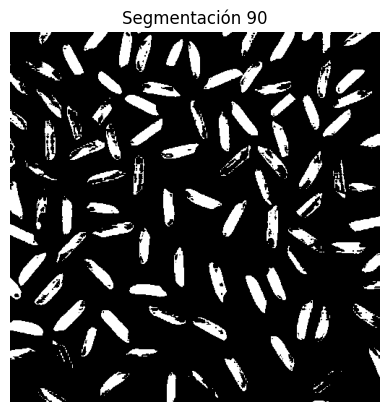

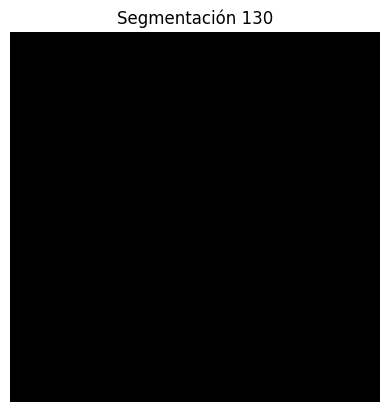

In [12]:
seg_90 = Xm > 90
seg_130 = Xm > 130

plt.imshow(seg_90, cmap='gray')
plt.title("Segmentación 90")
plt.axis("off")
plt.show()

plt.imshow(seg_130, cmap='gray')
plt.title("Segmentación 130")
plt.axis("off")
plt.show()



In [13]:
cv2.imwrite("seg_90.png", seg_90.astype(np.uint8)*255)
cv2.imwrite("seg_130.png", seg_130.astype(np.uint8)*255)


True

In [14]:
print(seg_90.shape)
print(seg_130.shape)


(512, 512)
(512, 512)


In [15]:
A = seg_90.astype(np.uint8)
B = seg_130.astype(np.uint8)


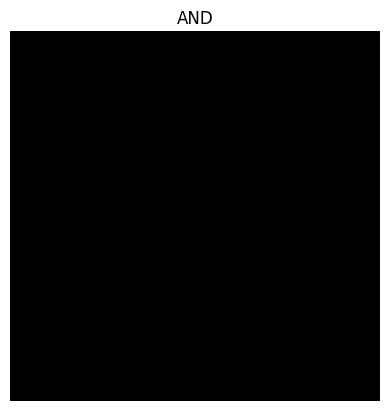

In [16]:
AND = cv2.bitwise_and(A, B)
plt.imshow(AND, cmap='gray')
plt.title("AND")
plt.axis("off")
plt.show()


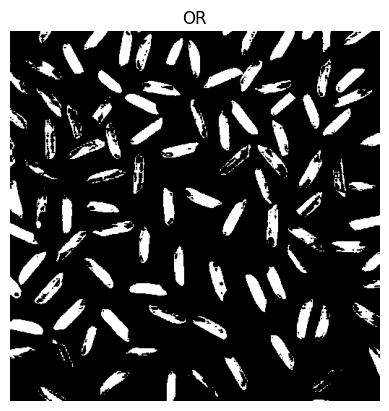

In [17]:
OR = cv2.bitwise_or(A, B)
plt.imshow(OR, cmap='gray')
plt.title("OR")
plt.axis("off")
plt.show()


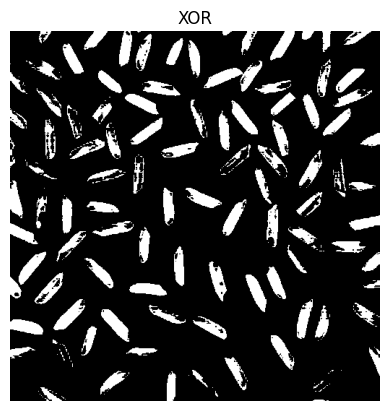

In [18]:
XOR = cv2.bitwise_xor(A, B)
plt.imshow(XOR, cmap='gray')
plt.title("XOR")
plt.axis("off")
plt.show()


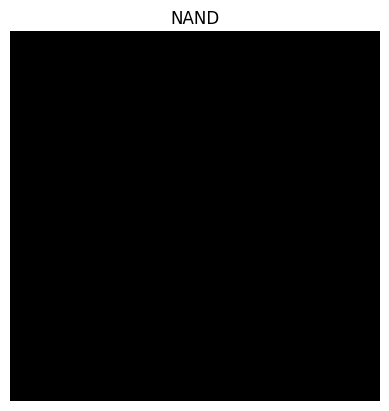

In [19]:
NAND = cv2.bitwise_not(AND)
plt.imshow(NAND, cmap='gray')
plt.title("NAND")
plt.axis("off")
plt.show()


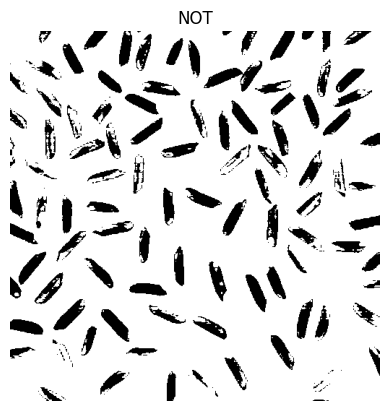

In [20]:
NOT_A = cv2.bitwise_not(A)
plt.imshow(NOT_A, cmap='gray')
plt.title("NOT")
plt.axis("off")
plt.show()


In [21]:
def suma_ponderada(I1, I2, alpha):
    beta = 1 - alpha
    resultado = alpha*I1 + beta*I2
    return np.clip(resultado, 0, 255).astype(np.uint8)


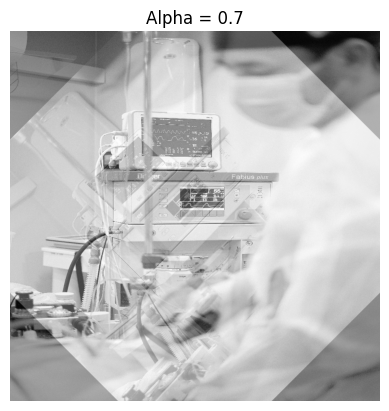

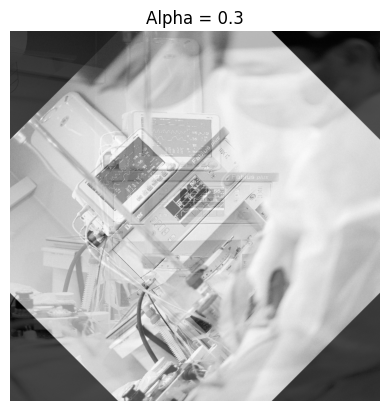

In [22]:
comb1 = suma_ponderada(img, img_r, 0.7)
comb2 = suma_ponderada(img, img_r, 0.3)

plt.imshow(comb1, cmap='gray')
plt.title("Alpha = 0.7")
plt.axis("off")
plt.show()

plt.imshow(comb2, cmap='gray')
plt.title("Alpha = 0.3")
plt.axis("off")
plt.show()


Al aplicar la suma ponderada se observa que el parámetro α controla la contribución de cada imagen en la combinación final. Cuando α = 0.7, la imagen original tiene mayor influencia visual. En cambio, cuando α = 0.3, la imagen transformada domina en la composición. Esto demuestra que la suma ponderada permite ajustar el nivel de mezcla entre dos imágenes de manera controlada